## 필요한 라이브러리 및 데이터 불러오기

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset("titanic")

## 데이터셋 EDA 및 전처리

In [3]:
df.shape

(891, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 결측치 처리하기

* age랑 deck 변수안에 결측치가 꽤나 있는 것을 확인하였다. embark_town에도 조금 있는 것을 확인할 수 있었다.
* deck 이라는 변수안에는 결측치가 너무 많으므로 추후에 drop 시킨다.
* age의 경우 따로 나이를 설정해줄 수도 있으나 임의로 나이를 설정하기에는 결과에 영향을 많이 줄 것같으므로 나이에 결측치가 있는 행을 삭제해준다.
* embark_town의 경우도 위와 같이 실행한다.

In [7]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
# deck 이라는 변수 드랍 시키기
df=df.drop("deck", axis=1)

In [9]:
# 결측치가 들어있는 행 삭제 시키기
df=df.dropna()

### 필요없는 칼럼 삭제하기

메모리를 효율적으로 사용하기 위해
* alive와 survived는 같은 항목이므로 alive 칼럼을 drop
* sex와 who 칼럼으로 성인 남성이 이미 구분되므로 adult_male drop  
시킨다

In [10]:
df=df.drop('alive', axis=1)
df=df.drop('adult_male', axis=1)
df=df.drop("class", axis=1)

### string으로 구성된 칼럼 변경하기

string 값으로 들어가 있는 칼럼들을 다음과 같이 바꿔준다.

성별은
* female: 0
* male: 1

In [11]:
df['sex'].value_counts()

male      453
female    259
Name: sex, dtype: int64

In [12]:
sex_dict = {'male': 1, 
           'female': 0}

df['sex'] = df['sex'].map(sex_dict)

-----------------------
embarked는
* S: 0
* C: 1
* Q: 2

In [13]:
df['embarked'].value_counts()

S    554
C    130
Q     28
Name: embarked, dtype: int64

In [14]:
embarked_dict = {'S': 0, 
            'C': 1,
            'Q': 2,
           }

df['embarked'] = df['embarked'].map(embarked_dict)

-----------------------
who는
* woman: 0
* man: 1
* child: 2

In [15]:
df['who'].value_counts()

man      413
woman    216
child     83
Name: who, dtype: int64

In [16]:
who_dict = {'woman': 0, 
            'man': 1,
            'child': 2,
           }

df['who'] = df['who'].map(who_dict)

-----------------------
embark_town는
* Southampton: 0
* Cherbourg: 1
* Queenstown: 2

In [17]:
df['embark_town'].value_counts()

Southampton    554
Cherbourg      130
Queenstown      28
Name: embark_town, dtype: int64

In [18]:
embark_town_dict = {'Southampton': 0, 
            'Cherbourg': 1,
            'Queenstown': 2,
           }

df['embark_town'] = df['embark_town'].map(embark_town_dict)

여기 부분 함수로 바꿀 수 있을 거 같습니다

### 시각화를 통해 데이터 확인하기

* 결정 변수 안의 값 확인하기

In [19]:
df['survived'].value_counts()

0    424
1    288
Name: survived, dtype: int64

* 전체 데이터에 대한 히스토그램 그려보기

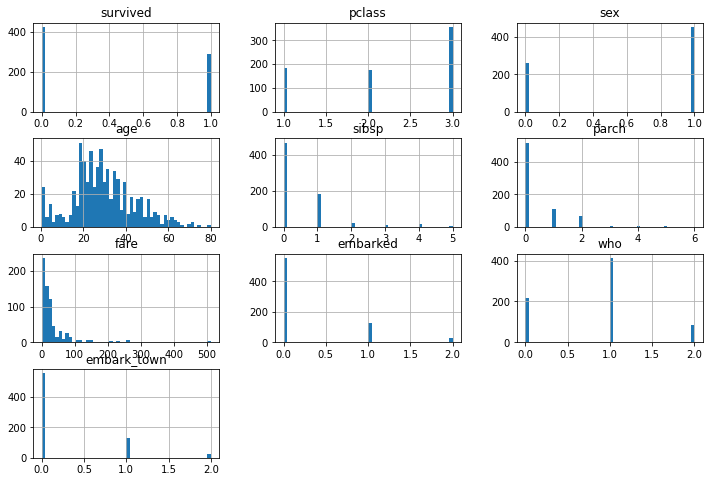

In [20]:
_=df.hist(bins=50, figsize=(12,8))

* 변수들간의 상관관계 분석하기

In [21]:
df.corr()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,embark_town,alone
survived,1.000000,-0.356462,-0.536762,-0.082446,-0.015523,0.095265,0.266100,0.108517,-0.296082,0.108517,-0.199741
pclass,-0.356462,1.000000,0.150826,-0.365902,0.065187,0.023666,-0.552893,-0.108502,0.248847,-0.108502,0.150576
sex,-0.536762,0.150826,1.000000,0.099037,-0.106296,-0.249543,-0.182457,-0.097129,0.586311,-0.097129,0.284009
age,-0.082446,-0.365902,0.099037,1.000000,-0.307351,-0.187896,0.093143,0.012186,-0.375849,0.012186,0.195766
sibsp,-0.015523,0.065187,-0.106296,-0.307351,1.000000,0.383338,0.139860,0.004021,0.244262,0.004021,-0.629408
parch,0.095265,0.023666,-0.249543,-0.187896,0.383338,1.000000,0.206624,-0.014082,0.075661,-0.014082,-0.577109
fare,0.266100,-0.552893,-0.182457,0.093143,0.139860,0.206624,1.000000,0.176859,-0.153789,0.176859,-0.262799
embarked,0.108517,-0.108502,-0.097129,0.012186,0.004021,-0.014082,0.176859,1.000000,-0.031509,1.000000,-0.049007
who,-0.296082,0.248847,0.586311,-0.375849,0.244262,0.075661,-0.153789,-0.031509,1.000000,-0.031509,-0.054358
embark_town,0.108517,-0.108502,-0.097129,0.012186,0.004021,-0.014082,0.176859,1.000000,-0.031509,1.000000,-0.049007


가장 눈에 먼저 들어오는 것은 검정부분들인데,
  - (adult_male, survived)
  - (pclass, fare)
  - (sibsp, alone)
  - (parch, alone)  
를 대표적으로 뽑아 볼 수 있다.

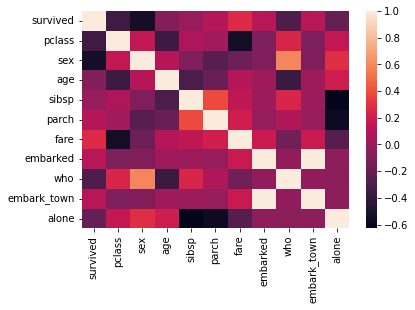

In [22]:
_=sns.heatmap(data=df.corr())

EDA는 우선 여기까지 하고 더 보충하면 될 거 같습니다.

In [23]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
who            0
embark_town    0
alone          0
dtype: int64

## 의사결정나무 

### 학습, 예측을 위한 사전 준비

In [24]:
# 종속변수 이름 설정하기
label_name='survived'

In [25]:
# 독립변수 이름 리스트 설정하기
feature_names=df.columns.tolist()
feature_names.remove(label_name)
feature_names

['pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'who',
 'embark_town',
 'alone']

In [26]:
# 각 X와 y 만들어주기
X=df[feature_names]
y=df[label_name]
X.shape, y.shape

((712, 10), (712,))

### training과 test 데이터셋 만들기

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   stratify=y,
                                                   random_state=42)

* 아래의 결과로 보아 잘 만들어 졌음을 확인할 수 있다.

In [29]:
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((569, 10), (569,), (143, 10), (143,))

### 의사결정나무 모델 구축하기(하이퍼 파라미터 튜닝X)

우선 하이퍼파라미터 따로 튜닝 하지 않고,
* max_depth=15
* max_features=0.9
* random_state=42  
를 이용하여 의사결정나무 모델을 구축해보도록 하겠다

**알고리즘 가져오기**

In [30]:
model = DecisionTreeClassifier(max_depth=10, 
                               max_features=0.9, 
                               random_state=42)
model

DecisionTreeClassifier(max_depth=10, max_features=0.9, random_state=42)

**학습시키기**

In [31]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_features=0.9, random_state=42)

In [32]:
y_predict = model.predict(X_test)
y_predict[:10]

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

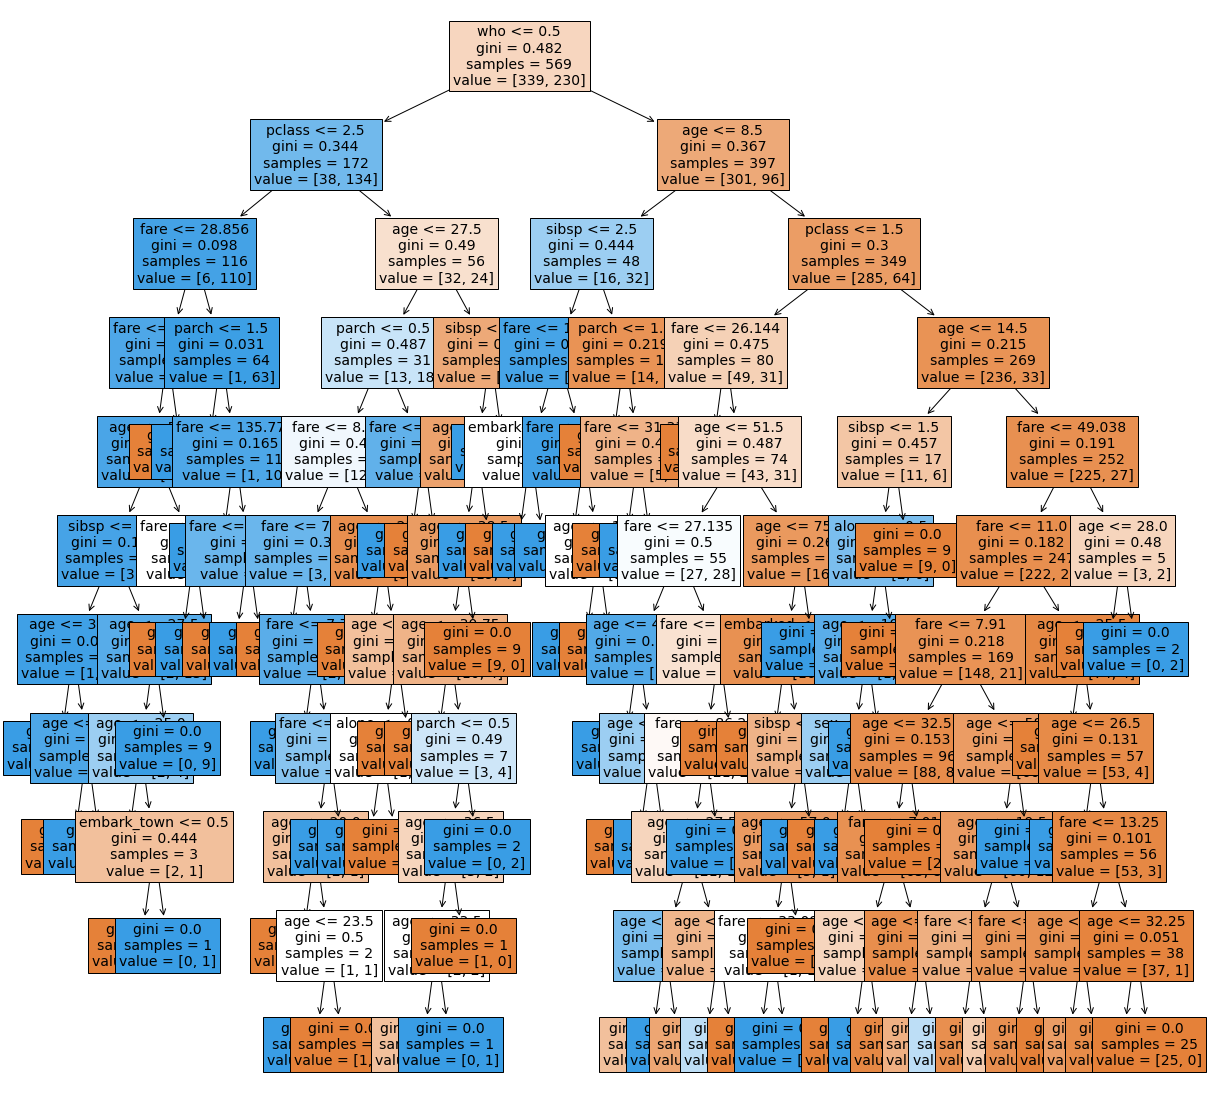

In [33]:
plt.figure(figsize=(20, 20))
plot_tree(model, filled=True, fontsize=14, feature_names=feature_names)
plt.show()

**Feature 중요도 확인하기**

<AxesSubplot:>

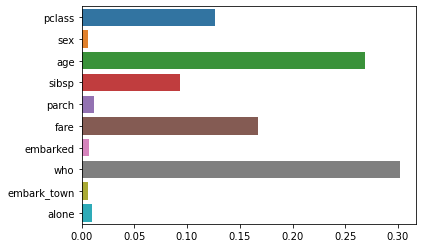

In [34]:
sns.barplot(x=model.feature_importances_, y=feature_names)

위의 결과를 통해 sex의 중요도가 가장 높게 나왔고, alone의 중요도가 가장 낮은 것으로 나오는것을 확인할 수 있었다.

**정확도 측정하기**

In [35]:
accuracy_score(y_test, y_predict)

0.7342657342657343

정확도는 대략 78% 정도가 나왔음을 확인할 수 있다.

### 의사결정나무 모델 구축하기(GridSearchCV)

In [36]:
# 각 파라미터에 대한 리스트를 만들어주기
max_depth_list = [2,3,5,7,9,12,15,20,40]
max_features_list =[0.1,0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

**학습시키기**

In [37]:
#GridSearchCV에 적용하기
parameters = {'max_depth':max_depth_list, 'max_features':max_features_list}

clf=GridSearchCV(model, param_grid=parameters, scoring="accuracy", n_jobs=-1, cv=5)
clf.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=10, max_features=0.9,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 7, 9, 12, 15, 20, 40],
                         'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                          0.8, 0.9, 1]},
             scoring='accuracy')

* GridSearchCV를 이용하여 모델을 돌려본 결과 다음과 같은 파라미터에서 다음과 같은결과가 가장 높은 결과라는 것을 알 수 있었다.
* 확실히 파라미터를 임의로 선택하였을 때보다 더 높은 정확도를 보인다는 것을 확인할 수 있다.

In [38]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=0.3, random_state=42)

In [39]:
# 최고 결과
clf.best_score_

0.8136935258500232

**Feature 중요도 확인하기**

sex의 중요도가 더 상승하였고, fare, age, pclass가 적지 않은 중요도를 가지고 있음을 확인할 수 있었다.

In [40]:
best_model_grid=clf.best_estimator_
best_model_grid.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_features=0.3, random_state=42)

<AxesSubplot:>

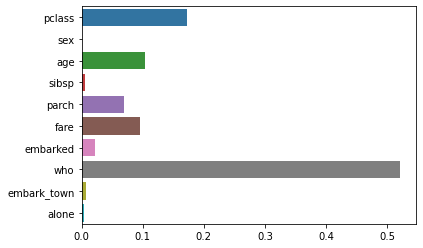

In [41]:
sns.barplot(x=best_model_grid.feature_importances_,y=feature_names)

### 의사결정나무 모델 구축하기(RandomSearchCV)

In [42]:
max_depth_list = [2,3,5,7,9,12,15,20,40]
max_features_list =[0.1,0.2, 0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

**학습시키기**

In [43]:
param_distributions={"max_depth": max_depth_list, "max_features":max_features_list }

clf=RandomizedSearchCV(model, param_distributions,cv=5,n_jobs=-1,random_state=42,n_iter=5)

clf.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(max_depth=10,
                                                    max_features=0.9,
                                                    random_state=42),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 5, 7, 9, 12, 15, 20,
                                                      40],
                                        'max_features': [0.1, 0.2, 0.3, 0.4,
                                                         0.5, 0.6, 0.7, 0.8,
                                                         0.9, 1]},
                   random_state=42)

같은 조건에서
* RandSearchCV를 이용하여 max_depth=5, max_features=0.3 일때 가장 좋은 결과를 얻을 수 있었다.
* GridSearchCV를 이용하였을 때보단 정확도는 더 떨어진 모습을 보이고 있다.

In [44]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=0.3, random_state=42)

In [45]:
#최고 결과
clf.best_score_

0.8136935258500232

**Feature 중요도 확인하기**

여전히 sex의 중요도가 가장 높았고, fare과 pclass가 적지 않은 중요도를 가지고 있음을 확인할 수 있었다.

In [46]:
best_model_rand=clf.best_estimator_
best_model_rand.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_features=0.3, random_state=42)

<AxesSubplot:>

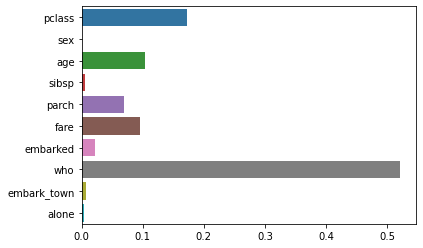

In [47]:
sns.barplot(x=best_model_rand.feature_importances_,y=feature_names)

### 의사결정나무 모델 구축하기(GridSearchCV, RandSearchCV) 

max_feature을 np.random으로 파라미터 리스트 만들어서 진행하기

In [48]:
max_depth_list=[i for i in range(1,11)]
max_features_list=np.random.uniform(0.3,0.9,20)

In [49]:
max_features_list

array([0.31252957, 0.83125799, 0.30890999, 0.61189455, 0.62103261,
       0.66202025, 0.80090456, 0.49613318, 0.43412966, 0.65862164,
       0.63949862, 0.77542919, 0.64222569, 0.62463199, 0.84002249,
       0.84820389, 0.71279866, 0.76845558, 0.32898919, 0.57104783])

**함수로 만들어서 한번에 비교하기**

매번 넣어주는 리스트의 구성마다 매번 다를 거기 때문에 함수로 만들어서 진행하기

In [54]:
def compare_GR(depth,feature):
    #gridsearch
    import time
    start = time.time()
    parameters = {'max_depth':max_depth_list, 'max_features':max_features_list}
    clf=GridSearchCV(model, param_grid=parameters, scoring="accuracy", n_jobs=-1, cv=5)
    clf.fit(X_train,y_train)
    grid_score=clf.best_score_
    print(f'GridSearch\n')
    print(f'Best Score parameters: {clf.best_estimator_}\n')
    print(f'Best Score: {grid_score}\n')
    print(f'Time: {time.time() - start}\n')
    print('-------------------------------------------------------------\n')
    
    
    #randsearch
    start = time.time()
    param_distributions={"max_depth": max_depth_list, "max_features":max_features_list }
    clf=RandomizedSearchCV(model, param_distributions,cv=5,n_jobs=-1,random_state=42,n_iter=5)
    clf.fit(X_train,y_train)
    rand_score=clf.best_score_
    print(f'RandSearch\n')
    print(f'Best Score parameters: {clf.best_estimator_}\n')
    print(f'Best Score: {rand_score}\n')
    print(f'Time: {time.time() - start}\n')
    print('-------------------------------------------------------------\n')
    
    #비교하기
    if grid_score > rand_score:
        print('GridSearhcv의 정확도가 더 높습니다.')
    elif grid_score < rand_score:
        print('RandSearhcv의 정확도가 더 높습니다.')
    elif grid_score==rand_score:
        print('같습니다')
    else:
        print('뭔가 이상합니다')

In [55]:
compare_GR(max_depth_list,max_features_list)

GridSearch

Best Score parameters: DecisionTreeClassifier(max_depth=5, max_features=0.3125295729042072,
                       random_state=42)

Best Score: 0.8136935258500232

Time: 0.43335390090942383

-------------------------------------------------------------

RandSearch

Best Score parameters: DecisionTreeClassifier(max_depth=5, max_features=0.8482038870479214,
                       random_state=42)

Best Score: 0.8100605496040988

Time: 0.026984691619873047

-------------------------------------------------------------

GridSearhcv의 정확도가 더 높습니다.


## 결론